# Exploratory Data Analysis (EDA) for Name Entity Recognition (NER)

## Purpose:
* Parse and clean data from sample repo
* Perform EDA to explore relationships and trends within data prior to machine learning
* Phase 1: Data Preparation

### Relevant Links:
- Data Repo
    * https://github.com/davidsbatista/NER-datasets/tree/master/CONLL2003
- Description of datasets used historically for NER
    * https://www.clips.uantwerpen.be/conll2003/ner/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re

In [4]:
# Open Text File
file1 = open('data/NER-datasets/CONLL2003/train.txt', 'r') 
# Read in ever line from text file into a list
Lines = file1.readlines() 

In [5]:
l = ['hello', 'world']
for elem in l:
    print(l)

['hello', 'world']
['hello', 'world']


In [6]:
# stopword list - borrowed from https://gist.github.com/sebleier/554280
# used to remove words with low value
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", 
             "you", "your", "yours", "yourself", "yourselves", "he", "him", 
             "his", "himself", "she", "her", "hers", "herself", "it", "its", 
             "itself", "they", "them", "their", "theirs", "themselves", "what", 
             "which", "who", "whom", "this", "that", "these", "those", "am", "is", 
             "are", "was", "were", "be", "been", "being", "have", "has", "had", 
             "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", 
             "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", 
             "with", "about", "against", "between", "into", "through", "during", 
             "before", "after", "above", "below", "to", "from", "up", "down", "in", 
             "out", "on", "off", "over", "under", "again", "further", "then", "once", 
             "here", "there", "when", "where", "why", "how", "all", "any", "both", 
             "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
             "not", "only", "own", "same", "so", "than", "too", "very", "s"," s", "t", 
             "can", "will", "just", "don", "should", "now"]

Stopwords = []

# append capitalizations to this list because this process will not lowercase
for i in range(0,len(stopwords)):
    elem = stopwords[i]
    Stopwords.append(elem)
    Stopwords.append(elem.capitalize())



In [8]:
# save changes to visualize steps within process
save_text = open('raw_text.txt','w')

# pre-allocate list - will append with word/NER pairs
word_NER = []

# number documents - use later for TF-IDF
num_docs = 0

for line in range(len(Lines)):
    
    # read in one line at a time
    row_text = Lines[line]
    
    if row_text == '-DOCSTART- -X- -X- O\n':
        # separate documents - omitting code temporarily based on specs
        num_docs += 1
        
    elif row_text == '\n':
        # separate sentences - omitting code temporarily based on specs
        pass
    else:
        # parse row by spaces and append tuple of word/NER pair
        # note: :-2 indexing removes newcharacters
        parsed = row_text.split(' ')
        word = parsed[0]
        NER = parsed[-1][:-2]
            
        word_NER.append((word, NER))
        
        # save original text for visualization
        save_text.writelines(row_text)

# close text file
save_text.close()  

In [9]:
vocab_df = pd.DataFrame(word_NER,columns=['Word', 'NER'])
vocab_df.head(20)

,Word,NER
0,EU,B-OR
1,rejects,
2,German,B-MIS
3,call,
4,to,
5,boycott,
6,British,B-MIS
7,lamb,
8,.,
9,Peter,B-PE


## Visualize Incoming Data 
Plot most common and least common words. 

__Key findings:__
* Most common words are stopwords and punctuation. We will have to remove this to reduce dimensionality in our vector space for a more accurate ML NER model
* Least common words occur 1 time and would have low term and document frequencies. These likely will not be captured in validation sets and can be removed as they are similarly noisy

Text(0.5, 1.0, 'Most commonly extracted "words"')

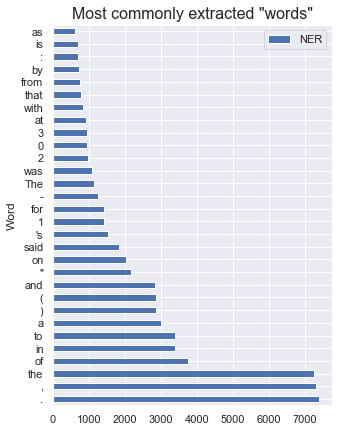

In [10]:
vocab_df.groupby('Word').count()\
    .sort_values(by='NER',ascending=False).head(30)\
    .plot(kind='barh', figsize=(5,7))
plt.title('Most commonly extracted "words"',fontsize=16)

Text(0.5, 1.0, 'Least commonly extracted "words"')

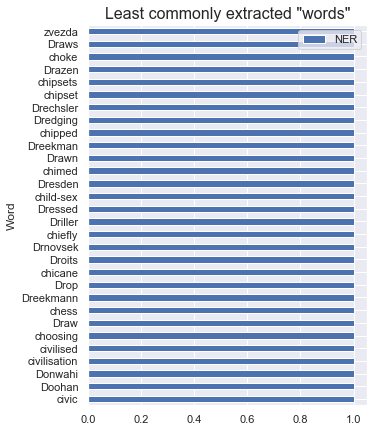

In [11]:
vocab_df.groupby('Word').count()\
    .sort_values(by='NER',ascending=False).tail(30)\
    .plot(kind='barh', figsize=(5,7))
plt.title('Least commonly extracted "words"',fontsize=16)

## Repeat above script, but include new cleaning features
* Removes some noise captured above

In [29]:
# save changes to visualize steps within process
save_text = open('raw_text.txt','w')

# pre-allocate list - will append with word/NER pairs
word_NER = []

# number documents - use later for TF-IDF
num_docs = 0

for line in range(len(Lines)):
    
    # read in one line at a time
    row_text = Lines[line]
    
    if row_text == '-DOCSTART- -X- -X- O\n':
        # separate documents - omitting code temporarily based on specs
        num_docs += 1
        
    elif row_text == '\n':
        # separate sentences - omitting code temporarily based on specs
        pass
    else:
        # parse row by spaces and append tuple of word/NER pair
        # note: :-2 indexing removes newcharacters
        parsed = row_text.split(' ')
        word = parsed[0]
        NER = parsed[-1][:-1]
        
        # remove stopwords
        if word in stopwords:
            word = ' '
        elif word.isnumeric():
            word = ' '
        else:
            # remove punctuation
            word = re.sub(r'[^\w\s]',' ',word)
            
        word_NER.append((word, NER))
        
        # save original text for visualization
        save_text.writelines(row_text)

# close text file
save_text.close()  

In [30]:
# cast this as a pandas dataframe
vocab_df = pd.DataFrame(word_NER,columns=['Word', 'NER'])
vocab_df.head(10)

,Word,NER
0,EU,B-ORG
1,rejects,O
2,German,B-MISC
3,call,O
4,,O
5,boycott,O
6,British,B-MISC
7,lamb,O
8,,O
9,Peter,B-PER


In [34]:
# Data Cleaning
# remove spaces and empty strings. drop all nans. 
vocab_df = vocab_df.replace('',np.nan)
vocab_df = vocab_df.replace(' ',np.nan)
vocab_df = vocab_df.replace('O',np.nan) # drops all words labeled NER=O which means we should ommit
vocab_df = vocab_df.dropna(how='any').reset_index(drop=True)
vocab_df.head(20)

,Word,NER
0,EU,B-ORG
1,German,B-MISC
2,British,B-MISC
3,Peter,B-PER
4,Blackburn,I-PER
5,BRUSSELS,B-LOC
6,European,B-ORG
7,Commission,I-ORG
8,German,B-MISC
9,British,B-MISC


## Visualize effects of cleaning routines
- Key findings:
    * Most common words now are about countries and locations
    * Top 4 NER categories show nice class balance. Bottom 5 NER categories show class inbalance. Preliminary models should be wary of this

Text(0.5, 1.0, 'Most commonly extracted "words"')

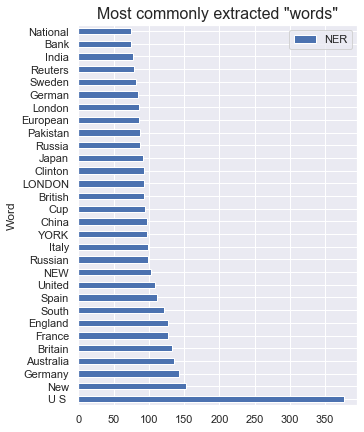

In [35]:
vocab_df.groupby('Word').count()\
    .sort_values(by='NER',ascending=False).head(30)\
    .plot(kind='barh', figsize=(5,7))
plt.title('Most commonly extracted "words"',fontsize=16)

Text(0.5, 1.0, 'Most commonly NER Element')

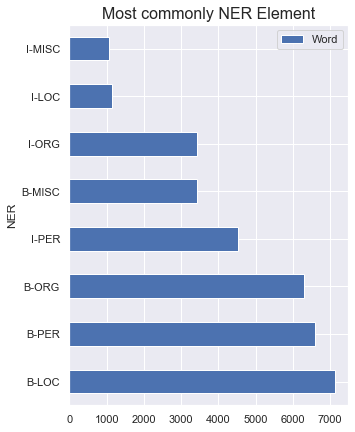

In [36]:
vocab_df.groupby('NER').count()\
    .sort_values(by='Word',ascending=False)\
    .plot(kind='barh', figsize=(5,7))
plt.title('Most commonly NER Element',fontsize=16)

# Functionalize script to clean train, test, and validation data
* This enables us to feed in clean data for ML models for part two

In [38]:
def cleanText(textdir):
    """Docstring: cleanText """
    
    # Open Text File
    file1 = open(textdir, 'r') 
    # Read in ever line from text file into a list
    Lines = file1.readlines()
    
    # pre-allocate list - will append with word/NER pairs
    word_NER = []

    # number documents - use later for TF-IDF
    num_docs = 0

    for line in range(len(Lines)):

        # read in one line at a time
        row_text = Lines[line]

        if row_text == '-DOCSTART- -X- -X- O\n':
            # separate documents - omitting code temporarily based on specs
            num_docs += 1

        elif row_text == '\n':
            # separate sentences - omitting code temporarily based on specs
            pass
        else:
            # parse row by spaces and append tuple of word/NER pair
            # note: :-2 indexing removes newcharacters
            parsed = row_text.split(' ')
            word = parsed[0]
            NER = parsed[-1][:-1]

            # remove stopwords
            if word in stopwords:
                word = ' '
            elif word.isnumeric():
                word = ' '
            else:
                # remove punctuation
                word = re.sub(r'[^\w\s]',' ',word)

            word_NER.append((word, NER))
    
    # cast this as a pandas dataframe
    vocab_df = pd.DataFrame(word_NER,columns=['Word', 'NER'])
    
    # Data Cleaning
    # remove spaces and empty strings. drop all nans. 
    vocab_df = vocab_df.replace('',np.nan)
    vocab_df = vocab_df.replace(' ',np.nan)
    vocab_df = vocab_df.replace('O',np.nan) # drops all words labeled NER=O which means we should ommit
    vocab_df = vocab_df.dropna(how='any').reset_index(drop=True)

    return vocab_df

# Save these to be read easily for ML notebook

In [40]:
# validation
textdir ='data/NER-datasets/CONLL2003/valid.txt'
valid_df = cleanText(textdir).to_csv('valid_df.csv',index=False)

# test
textdir ='data/NER-datasets/CONLL2003/test.txt'
test_df = cleanText(textdir).to_csv( 'test_df.csv',index=False)

# train
textdir ='data/NER-datasets/CONLL2003/train.txt'
train = cleanText(textdir).to_csv(   'train_df.csv', index=False)